In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
# Importing iris dataset for machine learning 
iris = load_iris()

In [5]:
X = iris.data

Y = iris.target

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Creating a DataFrame for the iris data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [8]:
# Setting the target variable for the dataset
iris_target = DataFrame(Y,columns=['Species'])

In [9]:
# The species data is by number, so this function replaces the numbers with their appropriate names
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virgenica'

In [10]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [11]:
# Combining the two DataFrames
iris = pd.concat([iris_data,iris_target],axis=1)

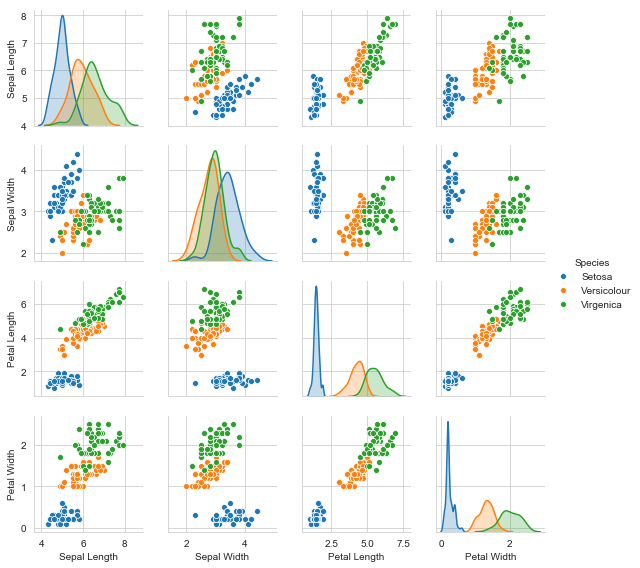

In [13]:
# Visualizing the data for a basic understanding
sns.pairplot(iris,hue='Species',height=2)

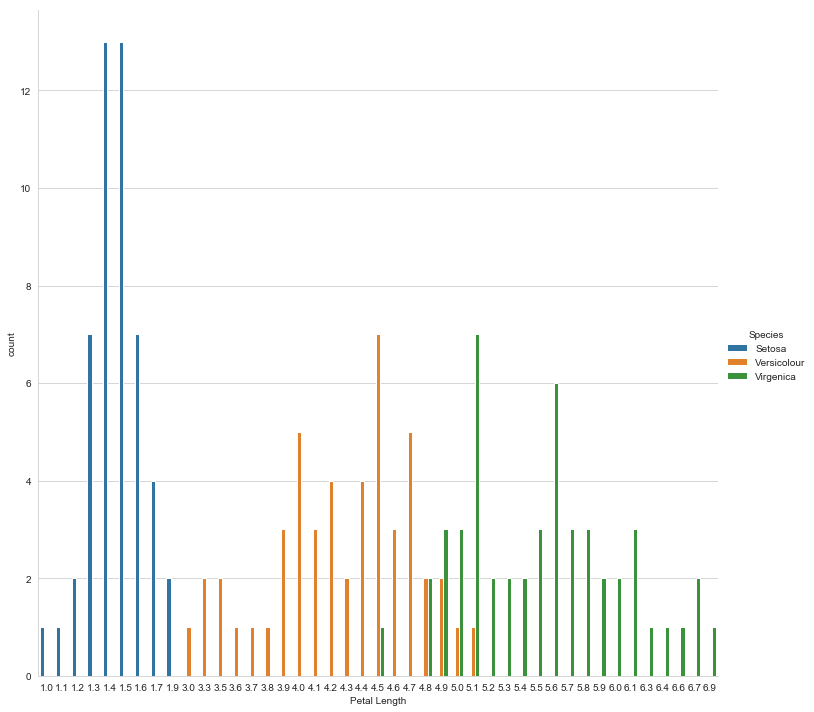

In [19]:
sns.catplot('Petal Length',data=iris,hue='Species',kind='count',height=10)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
# Creating a logistic regression object and the training and testing sets
logreg = LogisticRegression()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4, random_state =3)

In [22]:
# Fitting the model with the training sets
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
from sklearn import metrics

In [24]:
# Making predictions with test set
Y_pred = logreg.predict(X_test)

In [26]:
# Checking accuracy of the model
print (metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


In [27]:
# Using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [29]:
# Fit the training data to the new model
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [30]:
Y_pred = knn.predict(X_test)

In [31]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


With a k value of 6, the accuracy is 0.95

In [32]:
# Testing with k = 1
knn = KNeighborsClassifier(n_neighbors = 1)

In [33]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
Y_pred = knn.predict(X_test)

In [35]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [37]:
# Finding the best k value to use for optimal accuracy (using a loop since the dataset is relatively small)
k_range = range(1,21)

accuracy = []

In [38]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

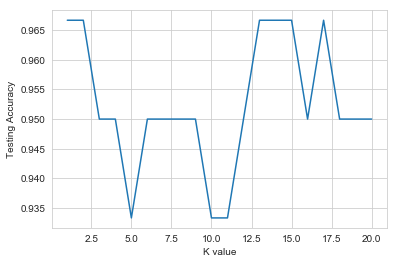

In [39]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')